# Getting Data

In [38]:
pip install alpha_vantage pandas

Note: you may need to restart the kernel to use updated packages.


In [39]:
from alpha_vantage.foreignexchange import ForeignExchange
from kaggle_secrets import UserSecretsClient
import pandas as pd
import time
import os

In [40]:
def fetch_historical_forex_data(api_key, from_symbol, to_symbol, interval, output_csv):
    """
    Fetch historical forex data from Alpha Vantage and save it as a CSV file.
    
    :param api_key: Your Alpha Vantage API key.
    :param from_symbol: Base currency symbol (e.g., 'EUR').
    :param to_symbol: Quote currency symbol (e.g., 'USD').
    :param interval: Timeframe (e.g., '1min', '5min').
    :param output_csv: Path to save the CSV file.
    """
    fx = ForeignExchange(key=api_key, output_format='pandas')
    
    try:
        if interval == '1min':
            data, _ = fx.get_currency_exchange_intraday(from_symbol=from_symbol, to_symbol=to_symbol, interval=interval, outputsize='full')
        else:
            data, _ = fx.get_currency_exchange_daily(from_symbol=from_symbol, to_symbol=to_symbol, outputsize='full')
        
        data.reset_index(inplace=True)
        data.to_csv(output_csv, index=False)
        print(f"Data for {interval} saved to {output_csv}")
    
    except Exception as e:
        print(f"Error fetching data for {interval}: {e}")

In [41]:
# Alpha Vantage API key
user_secrets = UserSecretsClient()
API_KEY = user_secrets.get_secret("AlphaVantage_api_key")

# Define parameters
from_currency = 'EUR'
to_currency = 'USD'
intervals = ['1min', '5min', '30min', '60min', '240min']  # Supported by Alpha Vantage
output_dir = 'forex_data'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Fetch data for each timeframe and save to CSV
for interval in intervals:
    output_file = os.path.join(output_dir, f"{from_currency}_{to_currency}_{interval}.csv")
    fetch_historical_forex_data(API_KEY, from_currency, to_currency, interval, output_file)
    time.sleep(60)  # Avoid hitting API rate limits

Error fetching data for 1min: Thank you for using Alpha Vantage! This is a premium endpoint. You may subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints
Data for 5min saved to forex_data/EUR_USD_5min.csv
Data for 30min saved to forex_data/EUR_USD_30min.csv
Data for 60min saved to forex_data/EUR_USD_60min.csv
Data for 240min saved to forex_data/EUR_USD_240min.csv


Columns in forex_data/EUR_USD_5min.csv: Index(['date', '1_open', '2_high', '3_low', '4_close'], dtype='object')


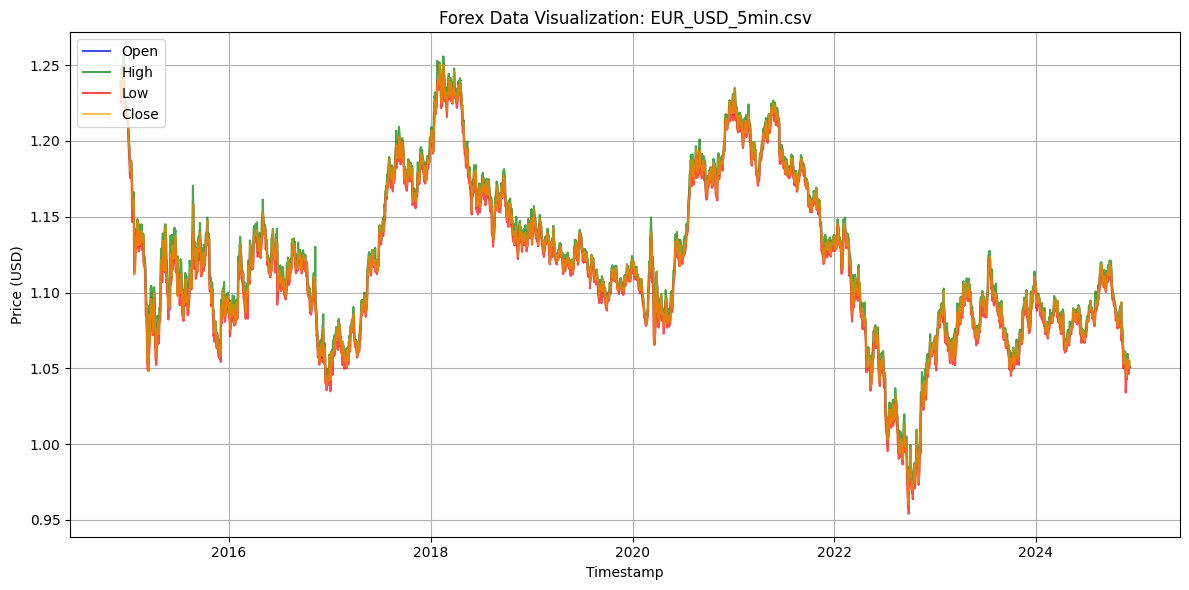

Graph saved to forex_graphs/EUR_USD_5min_chart.png
Columns in forex_data/EUR_USD_30min.csv: Index(['date', '1_open', '2_high', '3_low', '4_close'], dtype='object')


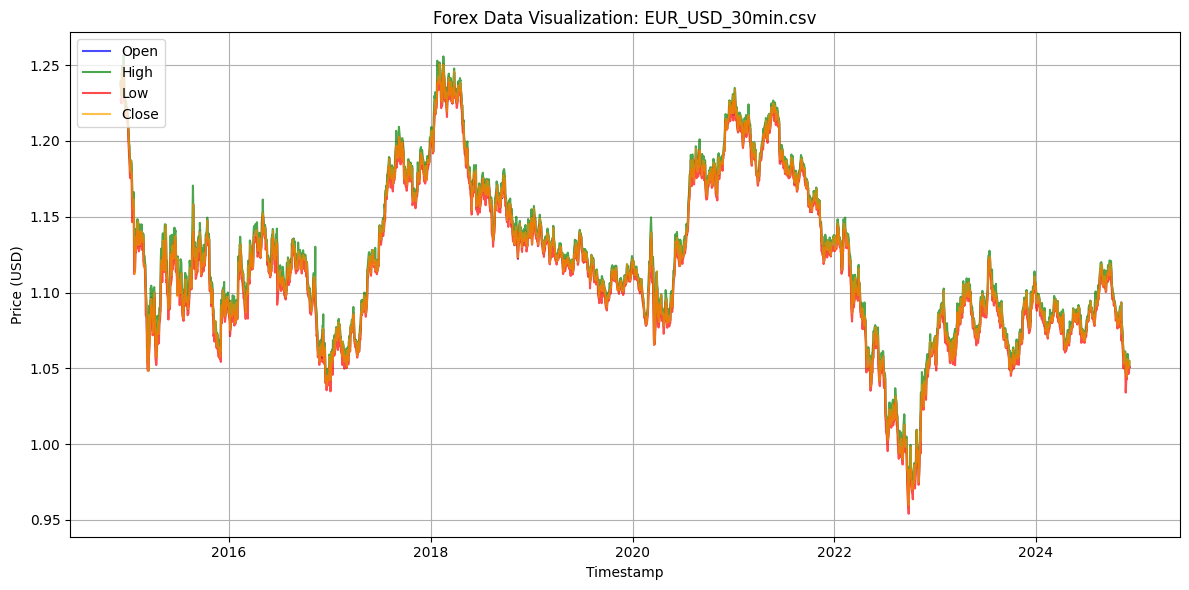

Graph saved to forex_graphs/EUR_USD_30min_chart.png
Columns in forex_data/EUR_USD_60min.csv: Index(['date', '1_open', '2_high', '3_low', '4_close'], dtype='object')


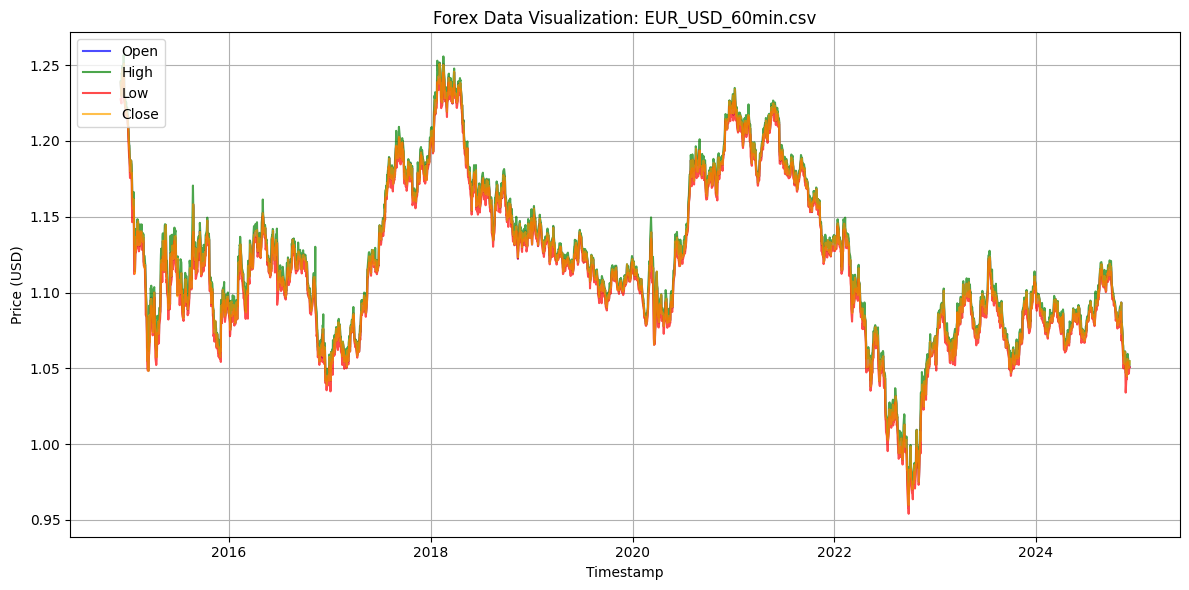

Graph saved to forex_graphs/EUR_USD_60min_chart.png
Columns in forex_data/EUR_USD_240min.csv: Index(['date', '1_open', '2_high', '3_low', '4_close'], dtype='object')


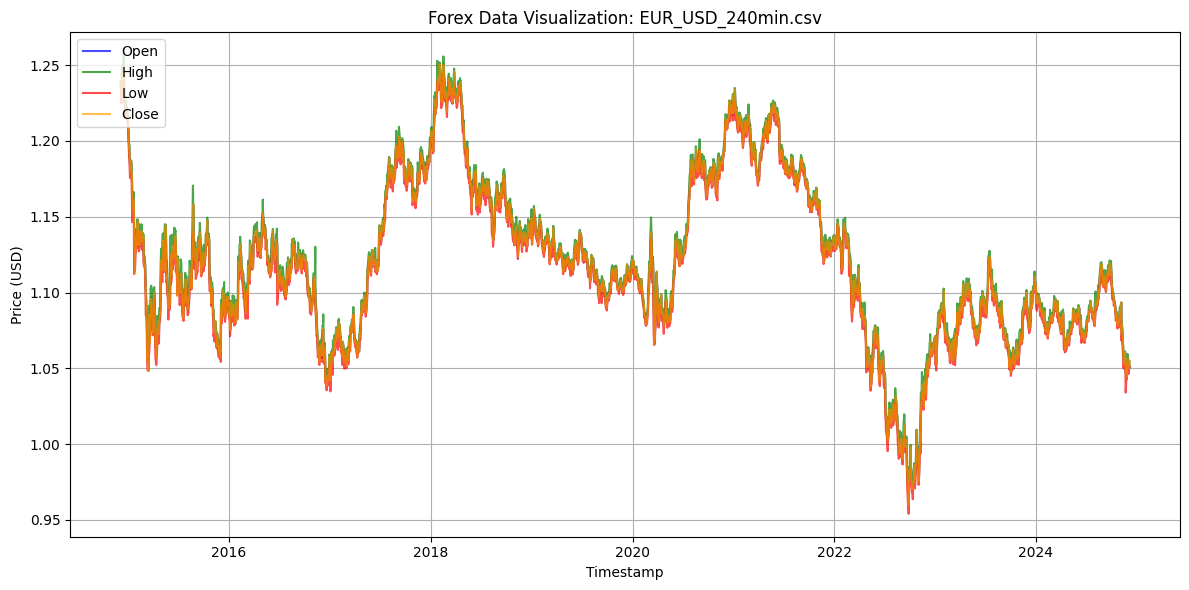

Graph saved to forex_graphs/EUR_USD_240min_chart.png


In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def plot_forex_data(file_path, output_path):
    """
    Generate combined charts for forex data.
    
    :param file_path: Path to the cleaned CSV file.
    :param output_path: Path to save the generated chart.
    """
    try:
        # Load cleaned data
        df = pd.read_csv(file_path)
        
        # Standardize column names
        df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '', regex=False)
        print(f"Columns in {file_path}: {df.columns}")
        
        # Rename columns to expected names
        column_mapping = {
            'date': 'timestamp',
            '1_open': 'open',
            '2_high': 'high',
            '3_low': 'low',
            '4_close': 'close'
        }
        df = df.rename(columns=column_mapping)
        
        # Ensure 'timestamp' exists and convert to datetime
        if 'timestamp' in df.columns:
            df['timestamp'] = pd.to_datetime(df['timestamp'])
        else:
            raise KeyError("Column 'timestamp' not found.")
        
        # Create a figure and axes
        fig, ax1 = plt.subplots(figsize=(12, 6))
        
        # Plot OHLC prices on the primary axis
        ax1.plot(df['timestamp'], df['open'], label='Open', color='blue', alpha=0.7)
        ax1.plot(df['timestamp'], df['high'], label='High', color='green', alpha=0.7)
        ax1.plot(df['timestamp'], df['low'], label='Low', color='red', alpha=0.7)
        ax1.plot(df['timestamp'], df['close'], label='Close', color='orange', alpha=0.7)
        ax1.set_ylabel("Price (USD)")
        ax1.set_xlabel("Timestamp")
        ax1.legend(loc='upper left')
        ax1.grid(True)
        
        # Final touches
        plt.title(f"Forex Data Visualization: {os.path.basename(file_path)}")
        plt.tight_layout()
        plt.savefig(output_path)
        plt.show()
        
        print(f"Graph saved to {output_path}")
    
    except Exception as e:
        print(f"Error plotting {file_path}: {e}")

# Directory and file paths
cleaned_dir = 'forex_data'
output_dir = 'forex_graphs'
os.makedirs(output_dir, exist_ok=True)

# Files to visualize
files_to_visualize = ['EUR_USD_5min.csv', 'EUR_USD_30min.csv', 'EUR_USD_60min.csv', 'EUR_USD_240min.csv']

# Plot each file
for file_name in files_to_visualize:
    cleaned_file = os.path.join(cleaned_dir, file_name)
    output_file = os.path.join(output_dir, f"{file_name.split('.')[0]}_chart.png")
    plot_forex_data(cleaned_file, output_file)

# Feature Engineering


You didn't provide the exact code. Here is the detailed explanation of the code:
1. Aim of the code: To compliment the existing trading algorithm (which uses bollinger bands) with the help of ML/DL by predicting Trade Confidence of the buy / sell action.
2. For preprocessing: Fetch all the different time frame data and do the following separately on each dataset:
Perform feature engineering on all the data by calculating bollinger bands column, Make a Action column to predict Buy/Sell/Stay According to my old Algorithm(Whom I need to compliment). Make another column which tells whether this Action has been fruitful or not (Made profit or not)
3. Use this data to then build 3 separate models(So that I can Chose best): LSTM , Random Forest, Transformer that predicts the probability of my proposed action to be profitable.
4. Keep following things in mind (To be incorporated later into the code (not now)): I have to use this model in a hosted / live bot to perform trades. I also need to constantly update my model with new data

Provide end to end code for above operations, Perform all the necessary operations that I might not have told you. 

In [43]:
pip install numpy pandas scikit-learn tensorflow matplotlib

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [44]:
!pip install ta

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
import ta

In [46]:
# Step 1: Feature Engineering
def feature_engineering(df):
    """
    Add features like Bollinger Bands, RSI, Moving Averages, and MACD.
    """
    # Bollinger Bands
    df['bb_high'] = ta.volatility.bollinger_hband(df['close'], window=20)
    df['bb_low'] = ta.volatility.bollinger_lband(df['close'], window=20)

    # Relative Strength Index (RSI)
    df['rsi'] = ta.momentum.rsi(df['close'], window=14)

    # Moving Averages
    df['sma'] = ta.trend.sma_indicator(df['close'], window=14)
    df['ema'] = ta.trend.ema_indicator(df['close'], window=14)

    # MACD
    macd = ta.trend.MACD(df['close'])
    df['macd'] = macd.macd()
    df['macd_signal'] = macd.macd_signal()

    # Fill NaN values
    df = df.fillna(method='bfill').fillna(method='ffill')

    return df

# Step 2: Label Generation
def generate_labels(df):
    """
    Create Action and Profitability labels based on old algorithm.
    """
    df['action'] = 0  # 0 = Stay, 1 = Buy, 2 = Sell
    df['profitability'] = 0  # 1 = Profitable, 0 = Not Profitable

    for i in range(1, len(df)):
        if df['close'].iloc[i] > df['bb_high'].iloc[i - 1]:
            df['action'].iloc[i] = 2  # Sell
        elif df['close'].iloc[i] < df['bb_low'].iloc[i - 1]:
            df['action'].iloc[i] = 1  # Buy

        # Profitability logic
        if df['action'].iloc[i] == 1 and df['close'].iloc[i + 1] > df['close'].iloc[i]:
            df['profitability'].iloc[i] = 1
        elif df['action'].iloc[i] == 2 and df['close'].iloc[i + 1] < df['close'].iloc[i]:
            df['profitability'].iloc[i] = 1

    return df

# Model Building

LSTM

In [47]:
# Step 4: Build Models
def build_lstm_model(input_shape):
    """
    Build LSTM model.
    """
    model = Sequential([
        LSTM(50, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

Random Forest

In [48]:
def build_random_forest():
    return RandomForestClassifier(n_estimators=200, random_state=42)

Transformer

In [49]:
# Transformer Model for Tabular Time-Series Data
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dense, Input, Flatten
from tensorflow.keras.models import Model

def build_transformer_model(input_shape, num_heads=4, ff_dim=64):
    inputs = Input(shape=input_shape)
    
    # Multi-head attention layer
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=input_shape[1])(inputs, inputs)
    attention_output = LayerNormalization()(attention_output + inputs)
    
    # Feed-forward network
    ffn_output = Dense(ff_dim, activation='relu')(attention_output)
    ffn_output = Dense(input_shape[1], activation='relu')(ffn_output)
    ffn_output = LayerNormalization()(ffn_output + attention_output)
    
    # Output layer
    flat = Flatten()(ffn_output)
    outputs = Dense(1, activation='sigmoid')(flat)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [50]:
# Step 5: Train and Evaluate Models
def train_and_evaluate(features, labels):
    """
    Train and evaluate models on the data.
    """
    results = {}

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, labels[:, 1], test_size=0.2, random_state=42)

    # Address class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    # Prepare LSTM data
    X_train_lstm = X_train_balanced.reshape((X_train_balanced.shape[0], 15, -1))
    X_test_lstm = X_test.reshape((X_test.shape[0], 15, -1))

    # LSTM
    lstm_model = build_lstm_model((15, X_train.shape[1]))
    lstm_model.fit(X_train_lstm, y_train_balanced, epochs=50, batch_size=32, verbose=1)
    lstm_predictions = (lstm_model.predict(X_test_lstm) > 0.5).astype(int).flatten()

    # Random Forest
    rf_model = build_random_forest()
    rf_model.fit(X_train_balanced, y_train_balanced)
    rf_predictions = rf_model.predict(X_test)

    # Evaluate
    results['LSTM Accuracy'] = accuracy_score(y_test, lstm_predictions)
    results['RF Accuracy'] = accuracy_score(y_test, rf_predictions)
    results['LSTM Precision'] = precision_score(y_test, lstm_predictions)
    results['RF Precision'] = precision_score(y_test, rf_predictions)
    results['LSTM Recall'] = recall_score(y_test, lstm_predictions)
    results['RF Recall'] = recall_score(y_test, rf_predictions)
    results['LSTM F1'] = f1_score(y_test, lstm_predictions)
    results['RF F1'] = f1_score(y_test, rf_predictions)
    results['LSTM AUC'] = roc_auc_score(y_test, lstm_predictions)
    results['RF AUC'] = roc_auc_score(y_test, rf_predictions)

    return results

In [51]:
# Step 6: Process and Train for Each Timeframe
timeframes = {
    'EUR_USD_5min.csv': '5min',
    'EUR_USD_30min.csv': '30min',
    'EUR_USD_60min.csv': '1hr',
    'EUR_USD_240min.csv': '4hr'
}

final_results = {}

for file, timeframe in timeframes.items():
    print(f"Processing timeframe: {timeframe}")
    df = pd.read_csv(file)
    df = feature_engineering(df)
    df = generate_labels(df)
    features, labels = prepare_data(df)
    final_results[timeframe] = train_and_evaluate(features, labels)

# Display Results
final_results_df = pd.DataFrame(final_results).T
print(final_results_df)

Processing timeframe: 5min


FileNotFoundError: [Errno 2] No such file or directory: 'EUR_USD_5min.csv'